In [2]:
import pandas as pd
import numpy as np

In [4]:
energydata=pd.read_csv('energydata_complete.csv')

In [6]:
energydata.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
print(energydata)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

In [10]:
import matplotlib as plt

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(energydata.iloc[:,2:])

In [14]:
np.shape(X)

(19735, 27)

In [16]:
#separer les observations en deux datasets le premiers pour analyse(l'entrainement) ou on prends que les 15000 premiers inputs
#et observtions 
#le deuxieme pour le teste ou on prends les 4753 restants

In [18]:
nbdatatrain=15000
#les observations pour l'entrainement
Y_train = energydata.iloc[:nbdatatrain,1] 
Y_test  = energydata.iloc[nbdatatrain:,1] 
Y_test.head()

15000     90
15001    110
15002     90
15003     90
15004     80
Name: Appliances, dtype: int64

In [20]:
# other variables
X_train = X[:nbdatatrain,:] 
X_test  = X[nbdatatrain:,:] 
np.shape(X_test)

(4735, 27)

In [22]:
#Appliquer les differentesregressions
#regression linéer multivariée 
#regression de ridge

LASSO REGRESSİON with penalisation

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

In [28]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

Creation d'un array avec multiples valeurs de lambda (le parametre de penalisation)

In [72]:
n_alphas = 100
alphas = np.logspace(-2, 1, n_alphas)

In [74]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [76]:
lasso = Lasso(max_iter=10000)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))

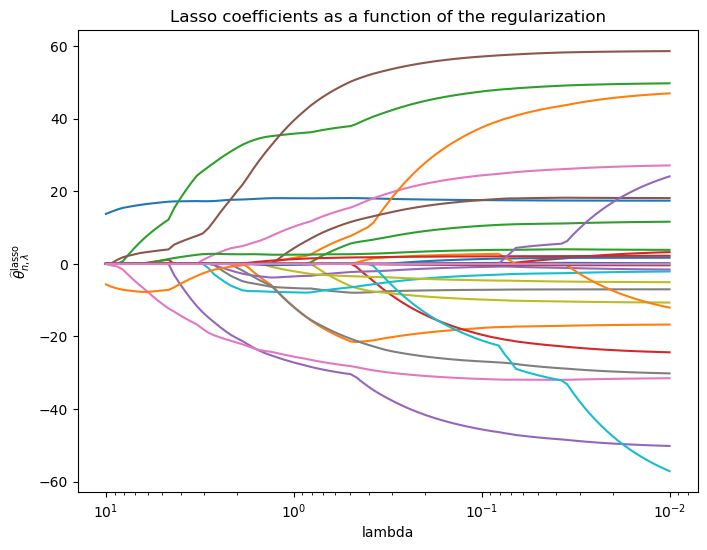

In [77]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

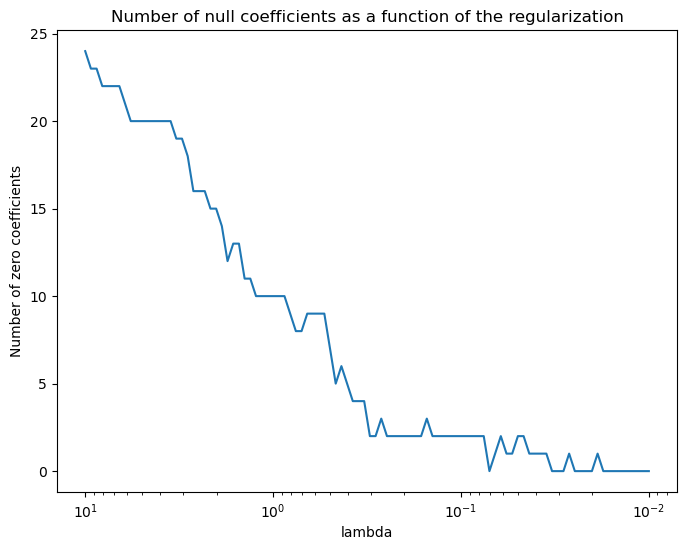

In [80]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, nb_zeros)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Number of zero coefficients')
plt.title("Number of null coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

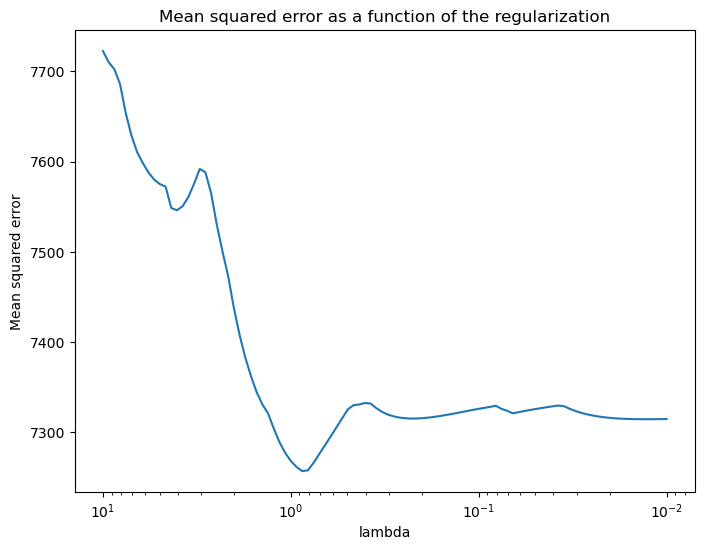

In [82]:
plt.figure(1,figsize=(8,6))
ax = plt.gca()
ax.plot(alphas, rmse) 
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

In [104]:
#plotting cross validation predictions
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(lasso, X_train, Y_train, cv=100)

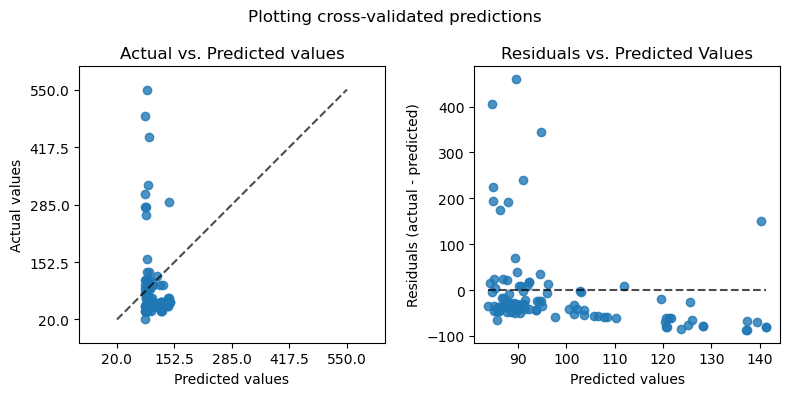

In [110]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
from sklearn.metrics import PredictionErrorDisplay

PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    Y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()